### 任务1:微调在ImageNet上预训练的卷积神经网络实现鸟类识别

下面是使用PyTorch实现在ImageNet上预训练的ResNet-18模型进行鸟类识别的代码示例：

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torch.utils.tensorboard import SummaryWriter

In [3]:
#加载数据集
from dataset_image import CUB
import transforms
from torch.utils.data import DataLoader
import time

time1 = time.time()
IMAGE_SIZE = 448
TRAIN_MEAN = [0.48560741861744905, 0.49941626449353244, 0.43237713785804116]
TRAIN_STD = [0.2321024260764962, 0.22770540015765814, 0.2665100547329813]
TEST_MEAN = [0.4862169586881995, 0.4998156522834164, 0.4311430419332438]
TEST_STD = [0.23264268069040475, 0.22781080253662814, 0.26667253517177186]

path = 'CUB_200_2011/CUB_200_2011'
train_transforms = transforms.Compose([
        transforms.ToCVImage(),
        transforms.RandomResizedCrop(IMAGE_SIZE),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(TRAIN_MEAN, TRAIN_STD)
    ])

test_transforms = transforms.Compose([
    transforms.ToCVImage(),
    transforms.Resize(IMAGE_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(TEST_MEAN,TEST_STD)
    ])

train_dataset = CUB(
        path,
        train=True,
        transform=train_transforms,
        target_transform=None
    )
    # print(len(train_dataset))
train_dataloader = DataLoader(
    train_dataset,
    batch_size=16,
    num_workers=4,
    shuffle=True
)

test_dataset = CUB(
        path,
        train=False,
        transform=test_transforms,
        target_transform=None
    )

test_dataloader = DataLoader(
    test_dataset,
    batch_size=16,
    num_workers=4,
    shuffle=True
)

time2 = time.time()

print(time2-time1)
train_len = train_dataset.__len__()
test_len = test_dataset.__len__()


0.03894948959350586


### 批量大小


[16, 32, 48, 64]
Training with batch size: 16
<class 'int'>


/data/dell/anaconda3/envs/qyh/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/dell/anaconda3/envs/qyh/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


512
Epoch 1/26
----------
train Loss: 5.1890 Acc: 0.0197
val Loss: 4.8195 Acc: 0.0578
Epoch 2/26
----------
train Loss: 4.4991 Acc: 0.0864
val Loss: 4.0446 Acc: 0.1700
Epoch 3/26
----------
train Loss: 3.8994 Acc: 0.1780
val Loss: 3.4783 Acc: 0.2461
Epoch 4/26
----------
train Loss: 3.4537 Acc: 0.2663
val Loss: 3.0528 Acc: 0.3459
Epoch 5/26
----------
train Loss: 3.1061 Acc: 0.3292
val Loss: 2.7295 Acc: 0.4014
Epoch 6/26
----------
train Loss: 2.8319 Acc: 0.3859
val Loss: 2.4615 Acc: 0.4439
Epoch 7/26
----------
train Loss: 2.5786 Acc: 0.4403
val Loss: 2.2085 Acc: 0.4995
Epoch 8/26
----------
train Loss: 2.3835 Acc: 0.4830
val Loss: 2.0398 Acc: 0.5202
Epoch 9/26
----------
train Loss: 2.2426 Acc: 0.5098
val Loss: 1.8392 Acc: 0.5609
Epoch 10/26
----------
train Loss: 2.0937 Acc: 0.5389
val Loss: 1.7695 Acc: 0.5773
Epoch 11/26
----------
train Loss: 1.9701 Acc: 0.5687
val Loss: 1.6975 Acc: 0.5994
Epoch 12/26
----------
train Loss: 1.8384 Acc: 0.5969
val Loss: 1.5759 Acc: 0.6194
Epoch 13/

/data/dell/anaconda3/envs/qyh/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/data/dell/anaconda3/envs/qyh/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


512
Epoch 1/26
----------
train Loss: 5.2877 Acc: 0.0120
val Loss: 5.0949 Acc: 0.0297
Epoch 2/26
----------
train Loss: 4.9280 Acc: 0.0494
val Loss: 4.7086 Acc: 0.0860
Epoch 3/26
----------
train Loss: 4.4996 Acc: 0.1061
val Loss: 4.2848 Acc: 0.1376
Epoch 4/26
----------
train Loss: 4.1072 Acc: 0.1700
val Loss: 3.8986 Acc: 0.2035
Epoch 5/26
----------
train Loss: 3.7605 Acc: 0.2372
val Loss: 3.5746 Acc: 0.2604
Epoch 6/26
----------
train Loss: 3.4836 Acc: 0.2868
val Loss: 3.3088 Acc: 0.3101
Epoch 7/26
----------
train Loss: 3.2552 Acc: 0.3390
val Loss: 3.0842 Acc: 0.3593
Epoch 8/26
----------
train Loss: 3.0425 Acc: 0.3805
val Loss: 2.8918 Acc: 0.3837
Epoch 9/26
----------
train Loss: 2.8651 Acc: 0.4124
val Loss: 2.7006 Acc: 0.4203
Epoch 10/26
----------
train Loss: 2.7166 Acc: 0.4416
val Loss: 2.5406 Acc: 0.4532
Epoch 11/26
----------
train Loss: 2.5774 Acc: 0.4691
val Loss: 2.3818 Acc: 0.4793
Epoch 12/26
----------
train Loss: 2.4278 Acc: 0.5063
val Loss: 2.2834 Acc: 0.5022
Epoch 13/

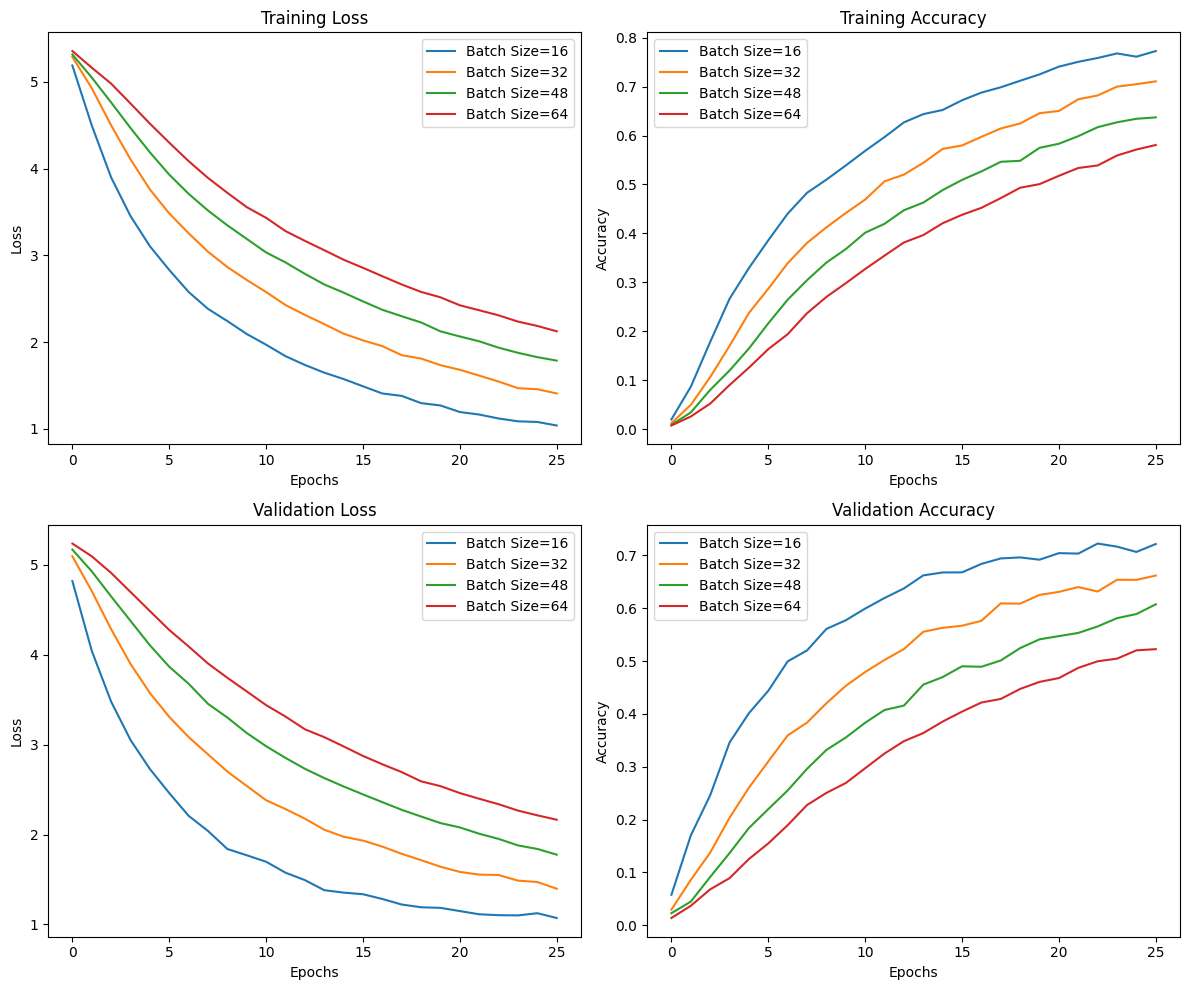

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np


# 存储每个学习率下的损失和准确率
lr_train_losses = []
lr_train_accuracies = []
lr_val_losses = []
lr_val_accuracies = []
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 训练模型
num_epochs = 26
lrs = [16,32,48,64]
print(lrs)
for lr in lrs:
    print(f'Training with batch size: {lr}')
    print(type(lr))
    train_dataloader = DataLoader(
    train_dataset,
    batch_size=lr,
    num_workers=4,
    shuffle=True
    )
    test_dataloader = DataLoader(
    test_dataset,
    batch_size=lr,
    num_workers=4,
    shuffle=True
    )
    # 加载预训练的ResNet-18模型
    model = models.resnet18(pretrained=True)
    num_ftrs = model.fc.in_features
    print(num_ftrs)
    model.fc = nn.Linear(num_ftrs, 200)  # 将输出层大小设置为200
    model = model.to(device)
    # 假设 model, train_dataloader, test_dataloader 已经定义好了
    # 定义损失函数和优化器
    criterion = nn.CrossEntropyLoss()
    parameter=model.parameters()
    optimizer = optim.SGD(parameter, lr=0.001, momentum=0.9)
    # 初始化变量用于存储损失和精度数据
    train_losses, train_accuracies,val_losses, val_accuracies = [],[], [], []
    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                dataloader = train_dataloader
                data_len = len(dataloader.dataset)
                model.train()
            else:
                dataloader = test_dataloader
                data_len = len(dataloader.dataset)
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / data_len
            epoch_acc = (running_corrects.double() / data_len).cpu().item()

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'train':
                train_losses.append(epoch_loss)
                train_accuracies.append(epoch_acc)
            else:
                val_losses.append(epoch_loss)
                val_accuracies.append(epoch_acc)
    # 将每个学习率下的整体损失和准确率存储起来
    lr_train_losses.append(train_losses)
    lr_train_accuracies.append(train_accuracies)
    lr_val_losses.append(val_losses)
    lr_val_accuracies.append(val_accuracies)
# 绘制损失和精度图
# 绘制每个学习率下的损失和准确率图
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, lr in enumerate(lrs):
    axes[0, 0].plot(lr_train_losses[i], label=f'Batch Size={lr}')
    axes[0, 1].plot(lr_train_accuracies[i], label=f'Batch Size={lr}')
    axes[1, 0].plot(lr_val_losses[i], label=f'Batch Size={lr}')
    axes[1, 1].plot(lr_val_accuracies[i], label=f'Batch Size={lr}')

axes[0, 0].set_title('Training Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()

axes[0, 1].set_title('Training Accuracy')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()

axes[1, 0].set_title('Validation Loss')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('Loss')
axes[1, 0].legend()

axes[1, 1].set_title('Validation Accuracy')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()

plt.tight_layout()
plt.show()